In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

%matplotlib inline

## Activation and Helper Function

In [54]:
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB", "#BBBBFF"])

In [20]:
def linear(H):
    return H

def ReLU(H):
    return H*(H>0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis = 1, keepdims = True)

def cross_entropy(Y, P_hat):
    return -np.sum(Y*np.log(P_hat))

def one_hot_encode(y):
    N=len(y)
    K = len(set(y))
    Y=np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]]=1
        
    return Y
def accuracy(y, y_hat):
    return np.mean(y==y_hat)

def OLS(Y,Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

def R2(y,y_hat):
    return sqrt((y-y_hat)^2)

In [47]:
class ANN():
    
    def __init__(self, mode=0):
        self.mode=mode
        
    def fit(self,X,y, neurons=10, eta=1e-3, epochs=1e3, show_curve=False):
        epochs=int(epochs)
        Y=one_hot_encode(y)
        
        N,D = X.shape
        
        K=Y.shape[1]
        
        self.W = {l: np.random.randn(M[0], M[1]) for l, M in enumerate(zip([D,neurons],[neurons,K]),1)}
        
        self.b = {l: np.random.randn(M) for l, M in enumerate([neurons,K],1)}
        
        if self.mode:
            self.a = {1:np.tanh, 2: linear}
            
        else:
            self.a = {1:np.tanh, 2: softmax}
            
        J = np.zeros(epochs)
       
        for epoch in range(epochs):
            self.forward(X)
           
            if self.mode:
                J[epoch]=OLS(Y,self.Z[2])
                
            else:
                
                J[epoch]= cross_entropy(Y,self.Z[2])
              
            self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
            self.b[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
          
            self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
            self.b[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)
          
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")
            plt.show()
        
    def forward(self, X):
        self.Z = {0:X}
        
        
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l] + self.b[l])
            
    def predict(self,X):
        self.forward(X)
        
        if self.mode:
            
            return self.Z[2]
            
        else:
            
            return self.Z[2].argmax(axis=1)
            

In [48]:
{str(i):j for i,j in zip(range(4), range(4,8))}

{'0': 4, '1': 5, '2': 6, '3': 7}

In [49]:
def main():
    D = 2
    K = 3
    N = int(K*1e3)

In [55]:
def main():
    D = 2
    K = 3
    N = int(K*1e3)
    
    X0 = np.random.randn((N//K),D) + np.array([2,2])
    X1 = np.random.randn((N//K),D) + np.array([0,-2])
    X2 = np.random.randn((N//K),D) + np.array([-2,2])
    X = np.vstack((X0,X1,X2))
    
    y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))
    
    myAnn = ANN()
    myAnn.fit(X,y, neurons=20, eta=3e-2, epochs=2e3, show_curve=True)
    y_hat = myAnn.predict(X)
    
    print(f"Training Accuracy: {accuracy(y,y_hat):0.4f}")
          
    x1 = np.linspace(X[:,0].min() -1, X[:,0].max(), 1000)
    x2 = np.linspace(X[:,1].min() -1, X[:,1].max(), 1000)
    
    xx1,xx2 = np.meshgrid(x1,x2)
    Z = myAnn.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(*xx1.shape)
    
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y, cmap=cmap_bold)
    plt.title(" Data ")
    
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y_hat, cmap=cmap_bold)
    plt.title(" Prediction ")
    plt.pcolormesh(xx1,xx2,Z, cmap=cmap_light)
    plt.show()

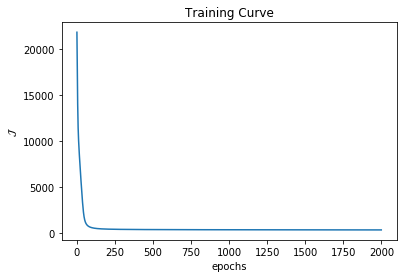

Training Accuracy: 0.9643


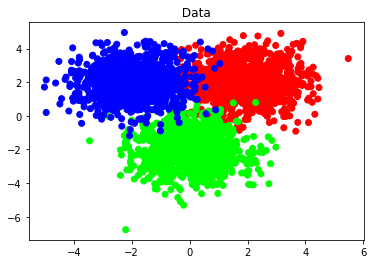

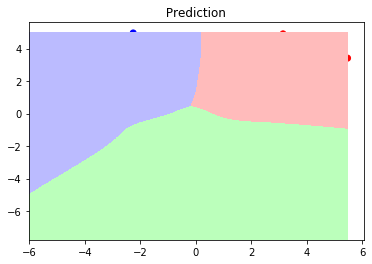

In [56]:
if  __name__ == "__main__":
    main()